# `mcsm-benchs`: Benchmarking methods for instantaneous frequency estimation

In [1]:
import numpy as np
from numpy import pi as pi
import scipy.signal as sg
import pandas as pd
from matplotlib import pyplot as plt
from mcsm_benchs.Benchmark import Benchmark
from mcsm_benchs.ResultsInterpreter import ResultsInterpreter
from mcsm_benchs.SignalBank import SignalBank
from utils import get_stft

## Creating a dictionary of signals

We can use the `SignalBank` class to generate a dictionary of signals to study. We are going to use three signals: 1) a linear chirp, 2) a cosenoidal chirp and 3) an exponential chirp. Below we can see how to generate the signals as well as their spectrograms, which show the trajectories of the instantaneous frequencies giving name to the signals.

We use the option `return_signal=True`, so that the signals generated by the `SignalBank` are objects of the `Signal` class, which behave like a regular `numpy` array, but include additional information of the generated signals, such as the instantaneous frequency of each signal component.

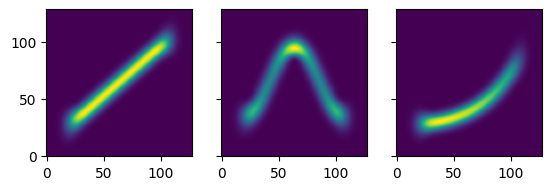

In [2]:
# Create a dictionary of signals:
N = 128
sb = SignalBank(N=N, return_signal=True)

signal_1 = sb.signal_linear_chirp()
signal_2 = sb.signal_cos_chirp()
signal_3 = sb.signal_exp_chirp()

# Create a dictionary of signals for later.
signals = {'linear_chirp':signal_1, 'cos_chirp':signal_2, 'exp_chirp':signal_3}

# Display the spectrograms of the signals.
stft1 = get_stft(signal_1)
stft2 = get_stft(signal_2)
stft3 = get_stft(signal_3)

fig, axs = plt.subplots(1,3, sharey=True)
axs[0].imshow(np.abs(stft1)**2, origin='lower')
axs[1].imshow(np.abs(stft2)**2, origin='lower')
axs[2].imshow(np.abs(stft3)**2, origin='lower')

## Creating a dictionary of methods

We will define two methods to estimate the instantaneous frequency of the previously created signals. Notice that all signals have only one component, which simplifies our methods, but **any method outputting a `list` of estimated instantaneous frequencies** (one per component) can be benchmarked. The benchmarking procedure takes care of matching the output of the method with the most similar component from the signal in order to compute the performance metric of each IF estimation.

An instantaneous frequency estimation consists in an array of the **same length of the signal** with normalized frequency (between $0$ and $0.5$). Sometimes, signal components might not *live* the entire duration of the signal. In such cases, the IF estimation is considered valid only where the component is defined, i.e. where it is *alive*. The remaining time can be filled with zeros.

The first method is based on the classical *analytical signal*. The latter is a complex signal, the real part of which is the original, real-valued signal, whereas its imaginary part is the Hilbert transform of the original signal. This way, one can estimate the instantaneous frequency as the **derivative of the phase** of the analytical signal.

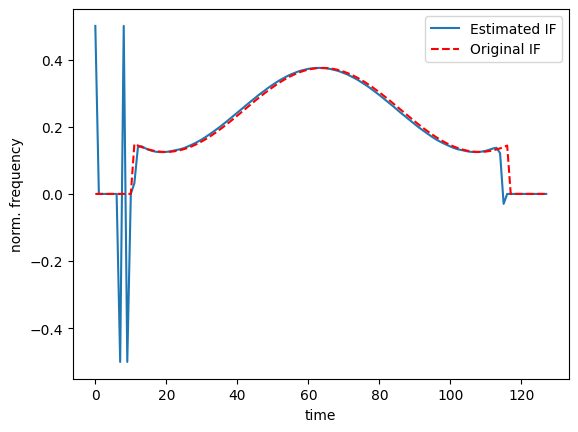

In [3]:
def method_1(signal):
    """ 
    Basic method for instantaneous frequency estimation 
    using analytic signal.
    """
    # 1. Analytic signal using Hilbert transform
    analytic_signal = sg.hilbert(signal)
    # 2. Get the derivative of the phase
    phase = np.unwrap(np.angle(analytic_signal))
    instf = np.diff(phase,append=phase[-1])/2/pi
    
    return [instf,] # List of estimated IFs, even if its only one.

# Check results using one of the signals defined before.
instf = method_1(signal_2)
plt.plot(instf[0], label='Estimated IF')
plt.plot(signal_2.instf[0],'r--', label='Original IF') # signal_2 is a Signal object with info about its IFs.
plt.xlabel('time'); plt.ylabel('norm. frequency')
plt.legend()


Notice that the estimation is only valid **where the original IF is different from zero** (this is taken into account in the benchmarking process).

The second method is based on the spectrogram. As shown before, the instantenous frequency of a signal component defines a trajectory in the time-frequency plane that one can track. We call this trajectory *ridge*. The method then tracks the ridge in the spectrogram and normalizes it to obtain an estimation of the instantaneous frequency.

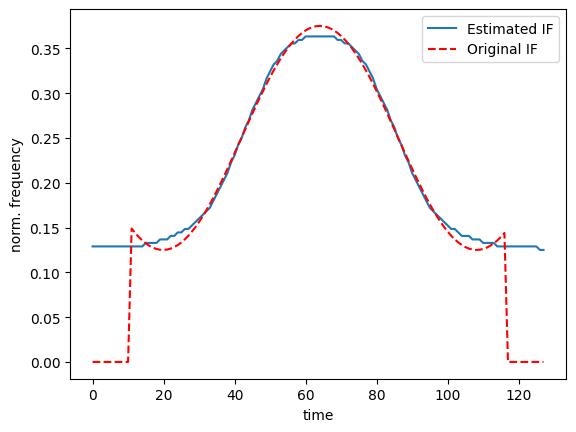

In [4]:

def get_ridge(stft):
    """ 
    Get a ridge from the stft of a signal
    """
    spectrogram = np.abs(stft)**2   
    ridge = np.zeros((spectrogram.shape[1]))
    for i in range(spectrogram.shape[1]):
        ridge[i] = np.argmax(spectrogram[:,i])
    
    return ridge

def method_2(signal):
    # 1. Compute STFT
    stft = get_stft(signal)
    # 2. Get ridge from spectrogram
    ridge = get_ridge(stft)
    return [ridge/N/2,]  # List of estimated IFs, even if its only one.

# Check results using one of the signals defined before.
instf = method_2(signal_2)
plt.plot(instf[0], label='Estimated IF')
plt.plot(signal_2.instf[0],'r--', label='Original IF') # signal_2 is a Signal object with info about its IFs.
plt.xlabel('time'); plt.ylabel('norm. frequency')
plt.legend()



Finally, we create a dictionary of methods to compare.

In [5]:
methods = {'method_1':method_1,'method_2':method_2}

## Instantiating a benchmark object

In [6]:
benchmark = Benchmark(task='inst_frequency',
                      methods=methods,
                    #   parameters=parameters,
                      signal_ids=signals,
                      SNRin=[0,10,20],
                      repetitions=30,
                      N = N)
benchmark.run()

Running benchmark...
- Signal linear_chirp


100%|██████████| 3/3 [00:00<00:00, 36.77it/s]


- Signal cos_chirp


100%|██████████| 3/3 [00:00<00:00, 62.48it/s]


- Signal exp_chirp


100%|██████████| 3/3 [00:00<00:00, 62.03it/s]

The test has finished.


{'perf_metric': {'linear_chirp': {0: {'method_1': {'((), {})': {'Comp.0': [np.float64(0.023348895819600257),
       np.float64(0.03979174079021587),
       np.float64(0.06607565605728193),
       np.float64(0.04338934228611128),
       np.float64(0.044232638890761955),
       np.float64(0.041296690561244485),
       np.float64(0.0604138964214883),
       np.float64(0.03904943041841814),
       np.float64(0.045831869768106874),
       np.float64(0.035102932761945815),
       np.float64(0.03719034671939433),
       np.float64(0.03767039093357804),
       np.float64(0.034813859660183216),
       np.float64(0.06353464350871478),
       np.float64(0.03208352311544564),
       np.float64(0.06018851665366399),
       np.float64(0.0354311415464003),
       np.float64(0.034265947390530495),
       np.float64(0.03972605695536964),
       np.float64(0.028790211978313822),
       np.float64(0.03960982624070145),
       np.float64(0.026457775711775607),
       np.float64(0.04282145109379904),
     

## Displaying results.

In [7]:
results = benchmark.results # Get dictionary with the results.
df = benchmark.dic2df(results) # Transform dictionary to DataFrame

Before displaying the results, we need to format the `DataFrame` in the correct way:

In [8]:
df = df.reset_index()
df = df.iloc[:,[3,4,1,5,2,6]]
col_names = list(df.columns)
col_names[0:6] = ['Method','Parameter', 'Signal_id','Repetition','SNR','QRF']
df.columns = col_names
df = df.pivot_table(index= ['Method','Parameter', 'Signal_id','Repetition'], columns='SNR', values='QRF')
df = df.reset_index()
df

SNR    Method Parameter     Signal_id  Repetition         0        10  \
0    method_1  ((), {})     cos_chirp           0  0.067135  0.007420   
1    method_1  ((), {})     cos_chirp           1  0.043916  0.004525   
2    method_1  ((), {})     cos_chirp           2  0.034689  0.013896   
3    method_1  ((), {})     cos_chirp           3  0.024331  0.009433   
4    method_1  ((), {})     cos_chirp           4  0.034245  0.009290   
..        ...       ...           ...         ...       ...       ...   
175  method_2  ((), {})  linear_chirp          25  0.003741  0.000167   
176  method_2  ((), {})  linear_chirp          26  0.001135  0.000129   
177  method_2  ((), {})  linear_chirp          27  0.008871  0.000068   
178  method_2  ((), {})  linear_chirp          28  0.008525  0.000057   
179  method_2  ((), {})  linear_chirp          29  0.002050  0.000319   

SNR        20  
0    0.003016  
1    0.001741  
2    0.006037  
3    0.007748  
4    0.003334  
..        ...  
175  0.000104  
176  0.000130  
177  0.000085  
178  0.000075  
179  0.000157  

[180 rows x 7 columns]

Finally, we can use the functionality from the `ResultsInterpreter` class to display the result on interactive plots (using `plotly`).

Here we display the mean squared error (MSE), which is the default performance metric for instantaneous frequency estimation (the lower, the better).

In [9]:
# Summary interactive plots with Plotly and a report.
from plotly.offline import  iplot
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"
interpreter = ResultsInterpreter(benchmark)

figs = interpreter.get_summary_plotlys(df, bars=True, ylabel='Mean Squared Error')
for fig in figs:
    iplot(fig)
